<a href="https://colab.research.google.com/github/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/05-Graficaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://github.com/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/img/matplotlib.png?raw=1" width="800"/>
</div>

# Graficación

[Matplotlib](https://matplotlib.org/stable/users/index) es una biblioteca muy completa para crear visualizaciones estáticas, animadas e interactivas en Python. El submodulo [pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) es la interface de matplotlib con el usuario.

Se acostumbra importar como

In [1]:
import matplotlib.pyplot as plt

Una de las clases fundamentales para graficar es [Figure](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.figure.html).

Otra clase importante es [Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes), la cual sirve para crear subfiguras dentro de una `Figure`.

Con el método `show()` podemos mostrar la figura creada.

In [2]:
plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

Hay varios métodos para añadir *información* a la figura:

* Una gráfica ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html))
* Puntos ([scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html))
* Histogramas ([hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html))
* Boxplots ([boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html))
* Imágenes ([imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html))
* ...

**Ejemplo:** Usando [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), graficar los puntos con coordenadas
$$(-1,1),(0,3),(2,-1),(0.5,-3).$$

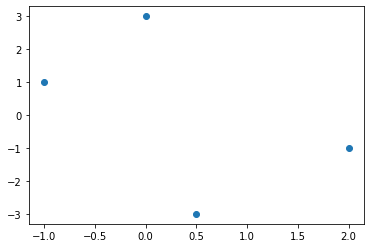

In [3]:
import numpy as np

valores = [[-1,1],[0,3],[2,-1],[0.5,-3]]

matriz = np.array(valores)

coordenadas_x = matriz[:,0]
coordenadas_y = matriz[:,1]

plt.figure()
plt.scatter(coordenadas_x,coordenadas_y)
# # Podríamos agregar más parámetros para personalizar la gráfica
# plt.scatter(coordenadas_x,coordenadas_y,
#             alpha=0.75,
#             s=80,
#             c='red',
#             marker='x',
#             linewidth=3
#             )
# # ------------------
plt.show()

**Ejemplo:** Usando [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), graficar la función
$$f(x)=x^3-2x+1$$
en el intervalo $[-3,3]$.

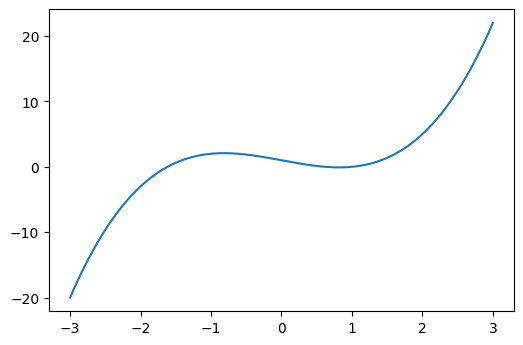

In [4]:
import numpy as np

def f(x):
    return x**3-2*x+1

valores_x = np.linspace(-3,3,num=200)
valores_y = [f(x) for x in valores_x] # Lista de compresión

plt.figure(dpi=100)
plt.plot(valores_x,valores_y)
plt.show()

Las siguientes funciones son útiles para gráficar los ejes o algunas líneas de referencia:

* [axhline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html): Dibuja una línea horizontal en la coordenada $y$ especificada cruzando toda la gráfica.
* [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html): Dibuja una línea vertical en la coordenada $x$ especificada cruzando toda la gráfica.

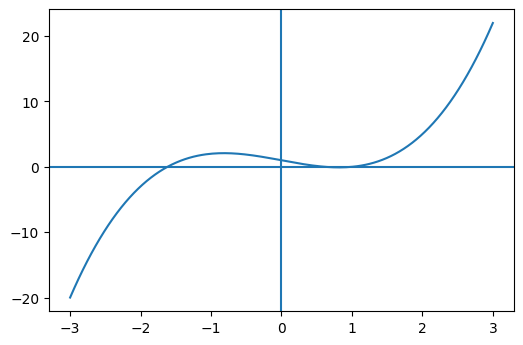

In [5]:
plt.figure(dpi=100)
plt.plot(valores_x,valores_y)
plt.axhline(0)
plt.axvline(0)
plt.show()

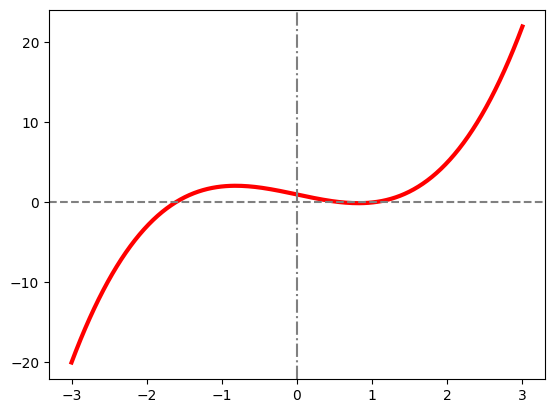

In [ ]:
plt.figure(dpi=100)
plt.plot(valores_x,valores_y,color='red',linewidth=3)
plt.axhline(0,color='gray',linestyle='--')
plt.axvline(0,color='gray',linestyle='-.')
plt.show()

Retomemos el ejemplo del cálculo del error relativo. Graficaremos los errores relativos en cada iteración.

In [9]:
def error_relativo(real, aproximacion):
    return np.abs((real-aproximacion)/real)

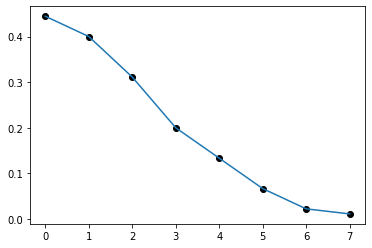

In [10]:
valor_real = 4.5

aproximaciones = np.array([2.5, 2.7, 3.1, 3.6, 3.9, 4.2, 4.6, 4.55])
num_aproximaciones = aproximaciones.shape[0]
iteraciones = list(range(num_aproximaciones))

errores_absolutos = error_relativo(valor_real, aproximaciones)

plt.figure()
plt.plot(iteraciones,errores_absolutos)
plt.scatter(iteraciones,errores_absolutos,color='black')
plt.show()

## Ejemplo: Comparación entre el método de la falsa posición y el de la secante

Retomamos las implementaciones del método de falsa posición y la secante, ahora implementados como funciones.

Limitaciones de esta implementación:
* $f(x_l)=f(x_u)$
* Revisar que $x_l<x_u$
* ¿Qué pasa si una nueva aproximación es $x_m=0$? 
* Posible diferencia entre el tamaño del arreglo de aproximaciones y errores

In [36]:
def falsa_posicion(f,xl,xu,tolerancia):
    '''
    f:      función
    xl:     extremo inferior del intervalo
    xu:     extremo superior del intervalo
    tol:    tolerancia
    '''
    x_m = xl
    error = 2*tolerancia
    errores = []
    aproximaciones = []
    n_iteraciones = 0
    while (error>tolerancia):
        n_iteraciones += 1
        x_m_anterior = x_m # aproximación anterior
        x_m = xu - (f(xu)*(xl-xu))/(f(xl)-f(xu))
        aproximaciones.append(x_m)
        if x_m != 0:
            error = error_relativo(x_m,x_m_anterior)
            errores.append(error)
        test = f(xl)*f(x_m)
        if test<0:
            xu = x_m
        elif test>0:
            xl = x_m
        else:
            error = 0
    return {'raiz': x_m,
            'error': error,
            'iteraciones': n_iteraciones,
            'errores': np.array(errores),
            'aproximaciones': np.array(aproximaciones)
            }

In [40]:
def secante(f,x0,x1,tolerancia):
    '''
    f:      función a la que encontraremos la raiz
    x0:     primera aproximación de la raiz
    x1:     segunda aproximación de la raiz
    tol:    tolerancia
    '''
    error = 2*tolerancia
    n_iteraciones = 0
    errores = []
    aproximaciones = []
    while (error>tolerancia):
        x_next = x1 - f(x1)*(x0-x1)/(f(x0)-f(x1))
        aproximaciones.append(x_next)
        if x1 != 0:
            error = error_relativo(x_next,x1)
            errores.append(error)
        x0 = x1
        x1 = x_next
        n_iteraciones += 1
    return {'raiz': x_next,
            'error': error,
            'iteraciones': n_iteraciones,
            'errores': np.array(errores),
            'aproximaciones': np.array(aproximaciones)
            }

Implementamos una función que grafique una función en un intérvalo

In [15]:
def graficar(f,a,b,num=100):
    eje_x = np.linspace(start=a,
                    stop=b,
                    num=num)
    eje_y = [f(x) for x in eje_x]  # Listas de compresión
    plt.figure(figsize=(7,5))
    plt.plot(eje_x,eje_y,color='red')
    plt.axhline(0,color='gray') # Dibujar eje X
    plt.show()

Consideremos la siguiente función y grafiquémosla.

In [33]:
def f(x):
    y = x**3 - 9*x**2 + 26*x - 23.8
    return y

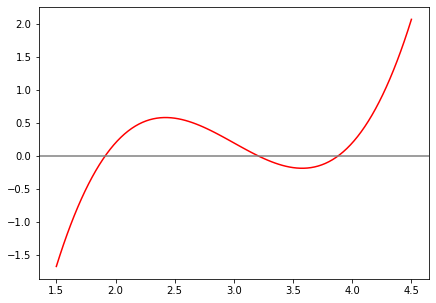

In [16]:
graficar(f,1.5,4.5)

In [41]:
resultados_fp = falsa_posicion(f,xl=2.5,xu=3.5,
                               tolerancia=0.0001) 
resultados_sc = secante(f,x0=2.5,x1=3,tolerancia=0.0001)

**Ejemplo:** Grafiquemos en una misma grafica, en diferente subgráfica, los errores relativos en cada iteración en cada método.

[Documentación](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

<ipython-input-55-54252ff0237c>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


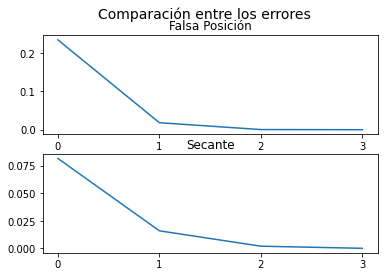

In [55]:
errores_fp = resultados_fp['errores']
num_iteraciones_fp = resultados_fp['iteraciones']
errores_sc = resultados_sc['errores']
num_iteraciones_sc = resultados_sc['iteraciones']

# ---- Graficamos ----
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Comparación entre los errores',fontsize=14)
ax1.plot(list(range(num_iteraciones_fp)),
         errores_fp)
ax1.set_xticks(list(range(num_iteraciones_fp)))
ax1.set_title("Falsa Posición")
ax2.plot(list(range(num_iteraciones_sc)),
         errores_sc)
ax2.set_xticks(list(range(num_iteraciones_sc)))
ax2.set_title("Secante")
fig.show()

<ipython-input-60-dfaad04e8d4e>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


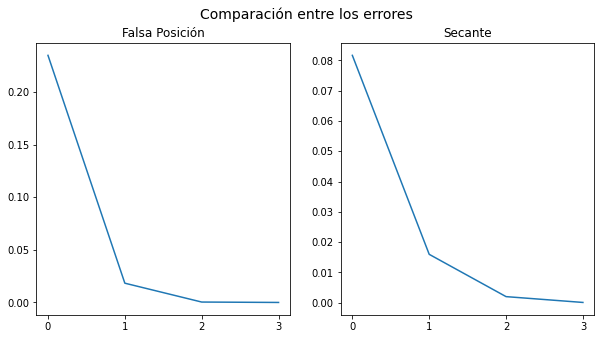

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2,)
fig.set_figwidth(10)
fig.set_figheight(5)
# fig.set_dpi(200)
fig.suptitle('Comparación entre los errores',fontsize=14)
ax1.plot(list(range(num_iteraciones_fp)),
         errores_fp)
ax1.set_xticks(list(range(num_iteraciones_fp)))
ax1.set_title("Falsa Posición")
ax2.plot(list(range(num_iteraciones_sc)),
         errores_sc)
ax2.set_xticks(list(range(num_iteraciones_sc)))
ax2.set_title("Secante")
fig.show()